In [1]:
#函数preprocess_text 用于分词
#参数content_lines为上面转换的list
#参数sentences是空list，用来储存分词后的数据
def preprocess_text(content_lines, sentences):
    for line in content_lines:
        try:
            segs=jieba.lcut(line)
            segs = [v for v in segs if not str(v).isdigit()]#去数字
            segs = list(filter(lambda x:x.strip(), segs))#去左右空格
            segs = list(filter(lambda x:len(x)>1, segs)) #长度为1的字符
            segs = list(filter(lambda x:x not in stopwords, segs)) #去掉停用词
            sentences.append(list(segs))
        except Exception:
            print(line)
            continue

In [2]:
import pandas as pd
import csv
import numpy as np
from numpy import *
import jieba
import math
import jieba.analyse

jieba.load_userdict("dictionary/chinese_stopwords2.txt")

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/c5/7hczl4kn71q53xxq5m3fjkyh0000gn/T/jieba.cache
Loading model cost 0.944 seconds.
Prefix dict has been built succesfully.


In [3]:
stopwords=pd.read_csv('dictionary/chinese_stopwords2.txt',index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')
stopwords=stopwords['stopword'].values
stopwords

array(['!', '"', '#', ..., '～±', '～＋', '￥'], dtype=object)

In [13]:
topicdf = pd.read_csv("../1. Crawl Past Topic Search/27MarTopTotalSearch.csv",names=['topic','end','start','volume','related?'],)

topicdf = topicdf.iloc[1:,:]
topicdf
topiclist = topicdf['topic'].values.tolist()

In [14]:
sentences = []
preprocess_text(topiclist, sentences)
random.shuffle(sentences) #将得到的数据集打散
for sentence in sentences:
    print(sentence)

['许光汉', '海边', '大片']
['英国', '新增', '名新冠', '肺炎', '感染者']
['江苏', '病例', '治愈']
['武汉', '痊愈', '患者', '医护', '名字', '写满', '外套']
['刘真']
['美股', '大涨']
['骑骆驼', '信号', '上网']
['武汉', '公交', '司机', '医护', '凌晨', '点半']
['大学生', '代码', '敲出', '樱花', '开放']
['江苏', '新增', '境外', '输入', '病例']
['纽约', '男子', '无人机', '女子', '电话号码']
['明星', 'cos', '惊艳']
['韩国', '罕见', '新冠', '病例']
['洛阳', '樱花', '一侧', '樱花', '一侧', '垂柳']
['武汉市', '民绘', '英雄', '城市', '图挂', '阳台']
['马薇']
['Uzi']
['泉州', '酒店', '倒塌', '地基']
['中国', '留学生', '讲述', '现状']
['ECMO', '抢救', '全程', '首次', '公开']
['女孩', '武汉', '谢谢你们']
['武汉', '距离', '解除', '疫情', '防控', '太远']
['美国', '多地', '急建', '方舱', '医院']
['太太', '离婚']
['复工', '同事', '相处', '方式']
['韩国', '意大利', '伊朗', '累计', '确诊', '总和', '万人']
['日本', '首家', '疫情', '倒闭', '企业']
['北海道', '知事']
['中国', '日本', '捐赠', '防护服']
['沈腾', '无脸', '表情']
['Facebook', '员工', '感染', '新冠', '病毒']
['爱奇艺', '闪退']
['龚正任', '上海市委', '书记']
['剑网']
['面具', '预告']
['呼吁', '外籍人士', '尽量减少', '不必要', '出行']
['贝佐斯', '损失', '亿美元']
['机场', '成秀场', '明星']
['上海', '首例', '哄抬', '口罩', '价格', '宣判']
['潘贵雨', '气死']
['非诚', '勿扰

['万多名', '党员', '捐款', '47.3', '亿元']
['开学']
['编剧', '六六', '武汉']
['马图', '伊迪', '感染', '新冠']
['医大', '奸杀', '嫌犯', '批捕']
['快船', '勇士']
['澳门', '娱乐场所', '重开']
['张含韵', '否认', '冠英', '恋情']
['斯黛拉', '英俊']
['日本', '再称', '奥运会', '如期举行']
['政客', '提供', '杀灭', '新冠', '病毒', '妙计']
['歌手']
['中国', '近期', '确诊', '病例', '下降', '趋势']
['杨凯', '周玉琢']
['陈梦瑶', '周艺轩', '粉丝']
['宣美开', '微博']
['模仿', '可不是', '超越']
['大学生', '作业', '数量']
['广东', '工地']
['完美', '关系', '大结局']
['全国', '新增', '确诊', '病例']
['成都双流机场', '旁有', '大熊猫']
['惊蛰']
['普京', '俄罗斯', '放假', '一周']
['江达', '智商', '上线']
['雪儿', '直拍']
['梁天']
['张檬金恩圣', '公布', '恋情']
['平底锅', '草莓', '千层', '蛋糕']
['上海', '新增', '境外', '输入', '病例']
['辣条', '炒面']
['孙正义', '提供', '肺炎', '检测', '日本', '网友', '恶评']
['白岩松', '连线', '中国', '国外', '抗疫', '专家']
['人均', '流量', '7.82', 'GB']
['巴西', '黑帮']
['日本', '网红', '猫咪', '猫叔', '去世']
['韩国', '累计', '确诊', '例新冠', '肺炎']
['粉笔', '模考']
['马云', '捐赠', '欧洲', '万个', '口罩']
['老奶奶', '口红', '必备品']
['全妆', '眼泪']
['湖北', '新增', '确诊', '个位数']
['追星']
['周艺轩', '陈梦瑶', '庆生']
['周迅', '演技']
['中方', '灵活处理', '美媒', '记者', '离境']
['周深', '雪

['华人', '讲述', '美国', '新冠', '病毒检测', '花销']
['伊朗', '暂时', '释放', '5.4', '万名', '囚犯']
['毕业', '三年', '同学', '差距']
['伊朗', '一名', '感染', '新冠', '病毒', '议员', '去世']
['朴宰范', '耳光']
['医护', '手机', '照片', '隔空', '喊话', '想念']
['姑姑', '保护', '似锦']
['泉州', '一家', '五口', '确认', '遇难']
['三成', '受访者', '维权', '满意']
['报答', '恋爱']
['美国', '中国', '医药品', '关税', '清单', '去除']
['已有', '农民工', '外出', '务工']
['BIGBANG', 'YG', '续约']
['比特']
['全英赛', '林丹救', '赛点', '赛季', '首胜']
['人民币', '隔离', '消毒']
['塞尔维亚', '国旗', '五星红旗', '系在']
['日本', '新冠', '肺炎', '治疗', '方案']
['瑞士', '德国', '被扣', '口罩']
['懂事', '受过', '委屈']
['韩国', '大邱', '确诊', '混入', '长队', '口罩']
['俄军', '展示', '机械', '外骨骼', '战士']
['方舱', '医院', '江文洋', '医生']
['中国', '工作组', '考察', '巴基斯坦', '蝗灾']
['刘亦菲', '黑天鹅']
['英国', '医生', '过期', '口罩']
['姑姑', '喜欢', '似锦']
['塞尔维亚', '地亮', '中国']
['库里', '复出']
['新冠', '肺炎', '治愈', '后遗症']
['吴尊', '老婆', '露脸', '原因']
['应援', '威龙']
['泰国', '确诊', '例新冠', '肺炎', '病例']
['林小宅', '抄袭']
['美国', '累计', '确诊', '万例']
['一线', '医护人员', '可爱']
['八五', '成功', '开单']
['湖北', '武汉', '新增', '确诊', '新增', '疑似', '清零']
['梨泰院', 'Class']
['郑州',

In [15]:
import gensim
from gensim.utils import simple_preprocess

In [16]:
#building dictionary and corpus for LDA
# numbering , word
dictionary = gensim.corpora.Dictionary(sentences)
print(dictionary.token2id)
corpus = [dictionary.doc2bow(text) for text in sentences]

for index, word in dictionary.iteritems():
    print(index, word)

print('Dictionary is built.')

{'大片': 0, '海边': 1, '许光汉': 2, '名新冠': 3, '感染者': 4, '新增': 5, '肺炎': 6, '英国': 7, '江苏': 8, '治愈': 9, '病例': 10, '写满': 11, '医护': 12, '名字': 13, '外套': 14, '患者': 15, '武汉': 16, '痊愈': 17, '刘真': 18, '大涨': 19, '美股': 20, '上网': 21, '信号': 22, '骑骆驼': 23, '公交': 24, '凌晨': 25, '司机': 26, '点半': 27, '代码': 28, '大学生': 29, '开放': 30, '敲出': 31, '樱花': 32, '境外': 33, '输入': 34, '女子': 35, '无人机': 36, '电话号码': 37, '男子': 38, '纽约': 39, 'cos': 40, '惊艳': 41, '明星': 42, '新冠': 43, '罕见': 44, '韩国': 45, '一侧': 46, '垂柳': 47, '洛阳': 48, '图挂': 49, '城市': 50, '武汉市': 51, '民绘': 52, '英雄': 53, '阳台': 54, '马薇': 55, 'Uzi': 56, '倒塌': 57, '地基': 58, '泉州': 59, '酒店': 60, '中国': 61, '现状': 62, '留学生': 63, '讲述': 64, 'ECMO': 65, '全程': 66, '公开': 67, '抢救': 68, '首次': 69, '女孩': 70, '谢谢你们': 71, '太远': 72, '疫情': 73, '解除': 74, '距离': 75, '防控': 76, '医院': 77, '多地': 78, '急建': 79, '方舱': 80, '美国': 81, '太太': 82, '离婚': 83, '同事': 84, '复工': 85, '方式': 86, '相处': 87, '万人': 88, '伊朗': 89, '总和': 90, '意大利': 91, '确诊': 92, '累计': 93, '企业': 94, '倒闭': 95, '日本': 96, '首家': 97, '北海道': 98, '

691 采取措施
692 晚安
693 短信
694 计划
695 娃娃
696 晒出
697 最丑
698 改名
699 申军
700 良为
701 纽约州
702 MH370
703 六周年
704 失联
705 马航
706 小朋友
707 送礼物
708 对轻症
709 瑞士
710 首都机场
711 恶心
712 英俊
713 备注
714 微信
715 暗恋
716 男生
717 恋爱
718 结局
719 联邦政府
720 长怒
721 实施
722 进口
723 零关税
724 果子狸
725 河南
726 绿化带
727 街头
728 文言文
729 时代
730 难记
731 天气
732 容器
733 形状
734 千玺
735 搭档
736 李俊
737 天天向上
738 乃万
739 实力
740 活塞
741 儿童
742 希土
743 德国
744 接收
745 边界
746 难民
747 制止
748 歧视
749 政策
750 离汉
751 场馆
752 奥运会
753 新建
754 永久
755 竣工
756 立案
757 记录
758 调查
759 配菜
760 两周
761 巴西
762 熔断
763 第五次
764 71.7%
765 集体
766 催泪
767 塔台
768 对话
769 航机
770 有翡
771 CLASS
772 梨泰院
773 刘昊然
774 定妆
775 全网
776 小猫
777 暴躁
778 两姐妹
779 出境
780 呼和浩特
781 TOP
782 心目
783 韩剧
784 大结局
785 孤独症
786 表面
787 一家
788 五口
789 姿势
790 遇难
791 彩妆
792 系列
793 花木兰
794 下跪
795 减少
796 出门
797 准确
798 央视
799 延迟
800 播出
801 晚会
802 关东煮
803 千页
804 豆腐
805 60%
806 中小企业
807 已达
808 开工率
809 经济
810 衰退
811 走向
812 热巴
813 翻牌
814 迪丽
815 万亩
816 南漳
817 迎春
818 二战
819 危机
820 总理
821 面临
822 片长
823 事故
824 作业
825 发生
826 坍塌
827 房屋

1818 大喊
1819 指导组
1820 中国联通
1821 总裁
1822 辞任
1823 林彦俊
1824 白色
1825 羽绒服
1826 占九席
1827 富豪
1828 白手起家
1829 手绢
1830 诅咒
1831 首相
1832 后援会
1833 五台山
1834 大火
1835 医用
1836 欧标
1837 运往
1838 小时
1839 研发
1840 特鲁多
1841 自我
1842 线上
1843 统一
1844 非初
1845 先锋
1846 法证
1847 真相
1848 英杰
1849 陪舒晴
1850 唐艺昕
1851 肚子
1852 工伤
1853 撤销
1854 猝死
1855 无奈
1856 女神
1857 法兰克福
1858 人设
1859 一瞬间
1860 巴菲特
1861 扩散
1862 法国
1863 第二阶段
1864 药强
1865 闲逛
1866 芬兰
1867 动员
1868 启动
1869 万多家
1870 外卖
1871 餐饮店
1872 主创
1873 神奇
1874 双开
1875 戴自
1876 拍卖
1877 获利
1878 谢罪
1879 轨迹
1880 一项
1881 了不起
1882 成就
1883 邱晨
1884 加州
1885 靠岸
1886 裴瑜
1887 奇探
1888 民国
1889 变色
1890 上课
1891 或录
1892 教师
1893 罗云熙
1894 海洋馆
1895 学生票
1896 延长
1897 火车
1898 never
1899 互动
1900 小鬼
1901 大哭
1902 民众
1903 马布里
1904 就位
1905 设备
1906 A50
1907 网民
1908 花岗岩
1909 地铁
1910 影视
1911 一日
1912 增长
1913 地图
1914 穿衣
1915 预警
1916 郑爽
1917 波塞
1918 露西
1919 地板
1920 成品油
1921 每桶
1922 美元
1923 北约
1924 撤军
1925 阿富汗
1926 赵又廷
1927 高圆圆
1928 建筑学家
1929 李道
1930 著名
1931 公共场所
1932 洗手
1933 吹灭
1934 梦幻
1935 薯片
1936 正确
1937 结石
1

3067 首场
3068 国航
3069 拍剧
3070 春日
3071 煎饼果子
3072 披露
3073 细节
3074 北京地铁
3075 号线
3076 幸存者
3077 可乐
3078 喝法
3079 隐藏
3080 全天
3081 火葬场
3082 贝加莫
3083 运作
3084 亚洲
3085 李晟敏
3086 刘雯
3087 美版
3088 现金
3089 适应性
3090 ClassOST
3091 金泰
3092 段小薇
3093 半数
3094 无效
3095 英超
3096 赛季
3097 基金
3098 入住
3099 偷窃
3100 潜入
3101 隔离病房
3102 韩延
3103 充分体现
3104 撤回
3105 重要性
3106 人士
3107 佩戴
3108 手带
3109 抵港
3110 三天
3111 亲属
3112 提前
3113 祭奠
3114 重返
3115 数据线
3116 气垫
3117 模考
3118 粉笔
3119 47.3
3120 六六
3121 编剧
3122 伊迪
3123 马图
3124 医大
3125 奸杀
3126 快船
3127 娱乐场所
3128 重开
3129 冠英
3130 张含韵
3131 再称
3132 如期举行
3133 妙计
3134 提供
3135 政客
3136 杀灭
3137 下降
3138 趋势
3139 近期
3140 周玉琢
3141 杨凯
3142 周艺轩
3143 陈梦瑶
3144 宣美开
3145 可不是
3146 超越
3147 数量
3148 工地
3149 成都双流机场
3150 旁有
3151 惊蛰
3152 一周
3153 俄罗斯
3154 智商
3155 梁天
3156 张檬金恩圣
3157 千层
3158 平底锅
3159 草莓
3160 炒面
3161 辣条
3162 孙正义
3163 恶评
3164 7.82
3165 GB
3166 人均
3167 流量
3168 黑帮
3169 猫叔
3170 猫咪
3171 必备品
3172 全妆
3173 眼泪
3174 个位数
3175 追星
3176 周迅
3177 灵活处理
3178 离境
3179 美媒
3180 落下
3181 雪花
3182 囚犯
3183 释放
3184 小提琴家
3185

In [17]:
#Generate Bag of Words on the data set
bow_corpus = [dictionary.doc2bow(text) for text in sentences]
bow_corpus


[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(8, 1), (9, 1), (10, 1)],
 [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)],
 [(18, 1)],
 [(19, 1), (20, 1)],
 [(21, 1), (22, 1), (23, 1)],
 [(12, 1), (16, 1), (24, 1), (25, 1), (26, 1), (27, 1)],
 [(28, 1), (29, 1), (30, 1), (31, 1), (32, 1)],
 [(5, 1), (8, 1), (10, 1), (33, 1), (34, 1)],
 [(35, 1), (36, 1), (37, 1), (38, 1), (39, 1)],
 [(40, 1), (41, 1), (42, 1)],
 [(10, 1), (43, 1), (44, 1), (45, 1)],
 [(32, 2), (46, 2), (47, 1), (48, 1)],
 [(49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)],
 [(55, 1)],
 [(56, 1)],
 [(57, 1), (58, 1), (59, 1), (60, 1)],
 [(61, 1), (62, 1), (63, 1), (64, 1)],
 [(65, 1), (66, 1), (67, 1), (68, 1), (69, 1)],
 [(16, 1), (70, 1), (71, 1)],
 [(16, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)],
 [(77, 1), (78, 1), (79, 1), (80, 1), (81, 1)],
 [(82, 1), (83, 1)],
 [(84, 1), (85, 1), (86, 1), (87, 1)],
 [(45, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1)]

In [18]:
#generate TFIDF matrix for each sentence
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.5421156840900704), (1, 0.5941845610008539), (2, 0.5941845610008539)]


In [19]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step, coherence):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [20]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
start = 2
limit = 15
step = 1

try:
    model_list, coherence_values_c_v = compute_coherence_values(dictionary=dictionary, 
                                                        corpus=corpus, texts=sentences, 
                                                        start=start, limit=limit, step=step, coherence='c_v')
except Exception as e:
    print(e)

In [21]:
coherence_values_c_v

[0.5309891200556545,
 0.6136568962418495,
 0.6121334814750179,
 0.630308541618286,
 0.6491799714611975,
 0.6419997331824956,
 0.6638660123418416,
 0.6406580654426848,
 0.6512436193426503,
 0.66831989917359,
 0.652386669351796,
 0.6700467294025608,
 0.6561375904683044]

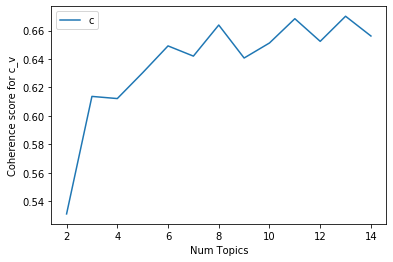

In [23]:
#找到最佳的主题数量
start = 2
limit = 15
step = 1
# Show graph
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values_c_v)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score for c_v")
plt.legend(("coherence_values"), loc='best')
plt.show()

Jan will choice number of topics as 3; Feb will choice optimal topic number at 5

In [37]:
#run LDA
#change num_topics if want to change the number of topics generated
optimal_lda_model = gensim.models.LdaModel(corpus, num_topics=8, id2word=dictionary, random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [38]:

model_topics = optimal_lda_model.show_topics(formatted=False)
model_topics
#print(optimal_lda_model.print_topics(num_words=10))

[(0,
  [('美国', 0.03554929),
   ('医院', 0.035365775),
   ('特朗普', 0.03150117),
   ('接触', 0.028151633),
   ('隔离', 0.02689723),
   ('汉克斯', 0.025491437),
   ('汤姆', 0.025491437),
   ('关闭', 0.025197426),
   ('方舱', 0.021488963),
   ('入境', 0.018226802)]),
 (1,
  [('疫情', 0.043051075),
   ('武汉', 0.032312248),
   ('留学生', 0.03169605),
   ('湖北', 0.030296316),
   ('回应', 0.016675722),
   ('援助', 0.016564105),
   ('战疫', 0.013800142),
   ('支援', 0.0135325175),
   ('抗疫', 0.013452661),
   ('地铁', 0.012929703)]),
 (2,
  [('中国', 0.08900957),
   ('开学', 0.038263444),
   ('酒店', 0.029185036),
   ('泉州', 0.021423046),
   ('可爱', 0.016353667),
   ('欣佳', 0.014589629),
   ('取消', 0.013737493),
   ('国家', 0.012824051),
   ('医疗', 0.012042357),
   ('同学', 0.011747855)]),
 (3,
  [('肺炎', 0.10648825),
   ('英国', 0.04433597),
   ('例新冠', 0.035857156),
   ('东京', 0.018785618),
   ('奥运会', 0.01723163),
   ('实施', 0.015839694),
   ('推迟', 0.015097391),
   ('德国', 0.01213289),
   ('奥运', 0.011107839),
   ('上课', 0.01077808)]),
 (4,
  [('已有', 0

In [39]:
for i, topics in optimal_lda_model.show_topics(15, formatted=False):
    print('topic', i, ':', '|'.join([t for t, _ in topics]))

topic 0 : 美国|医院|特朗普|接触|隔离|汉克斯|汤姆|关闭|方舱|入境
topic 1 : 疫情|武汉|留学生|湖北|回应|援助|战疫|支援|抗疫|地铁
topic 2 : 中国|开学|酒店|泉州|可爱|欣佳|取消|国家|医疗|同学
topic 3 : 肺炎|英国|例新冠|东京|奥运会|实施|推迟|德国|奥运|上课
topic 4 : 已有|口罩|全国|发现|好笑|具荷|近百家|房企|破产|美股
topic 5 : 输入|新增|北京|境外|总统|钟南山|塞尔维亚|毕业生|经历|直播
topic 6 : 确诊|新冠|病例|意大利|韩国|累计|感染|医生|全球|升至
topic 7 : 描述|妻子|日本|原因|建议|患者|很大|提雪字|回国|复工


In [34]:
for idx, topic in optimal_lda_model.print_topics(num_words=25):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.031*"肺炎" + 0.030*"新冠" + 0.026*"中国" + 0.013*"英国" + 0.011*"开学" + 0.011*"特朗普" + 0.010*"接触" + 0.009*"隔离" + 0.009*"酒店" + 0.008*"汉克斯" + 0.008*"汤姆" + 0.008*"感染" + 0.007*"妻子" + 0.007*"记者" + 0.006*"泉州" + 0.006*"总统" + 0.006*"钟南山" + 0.006*"原因" + 0.006*"塞尔维亚" + 0.005*"毕业生" + 0.005*"建议" + 0.004*"护照" + 0.004*"援助" + 0.004*"欣佳" + 0.004*"法证"
Topic: 1 
Words: 0.034*"确诊" + 0.019*"病例" + 0.016*"意大利" + 0.011*"韩国" + 0.011*"输入" + 0.011*"美国" + 0.011*"新增" + 0.011*"医院" + 0.010*"北京" + 0.010*"疫情" + 0.009*"境外" + 0.009*"例新冠" + 0.008*"累计" + 0.008*"已有" + 0.007*"关闭" + 0.007*"武汉" + 0.007*"全国" + 0.007*"近百家" + 0.007*"破产" + 0.007*"房企" + 0.007*"湖北" + 0.007*"医生" + 0.007*"留学生" + 0.006*"日本" + 0.006*"方舱"
Topic: 2 
Words: 0.010*"描述" + 0.009*"口罩" + 0.009*"海豚" + 0.009*"河道" + 0.009*"威尼斯" + 0.009*"变清" + 0.009*"提雪字" + 0.009*"很大" + 0.006*"好笑" + 0.006*"东京" + 0.005*"奥运会" + 0.005*"患者" + 0.005*"可爱" + 0.005*"安家" + 0.005*"具荷" + 0.005*"推迟" + 0.005*"哥哥" + 0.005*"美股" + 0.004*"回国" + 0.004*"封面" + 0.004*"贵州" + 0.004*"成功" + 0.00

In [36]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(optimal_lda_model, corpus, dictionary)
p = pyLDAvis.save_html(p, '27Mar_lda_topicmodelling.html')

/Users/miya/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [25]:
import matplotlib
matplotlib.matplotlib_fname()

'/Users/miya/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

<--------------------------------------Small Dataset for understanding--------------------------------------------

In [8]:
sentences = ["我喜欢吃土豆","土豆是个百搭的东西","我不喜欢今天雾霾的北京"]

In [9]:
words=[]
for doc in sentences:
    words.append(list(jieba.cut(doc)))
words

[['我', '喜欢', '吃', '土豆'],
 ['土豆', '是', '个', '百', '搭', '的', '东西'],
 ['我', '不', '喜欢', '今天', '雾', '霾', '的', '北京']]

In [10]:
from gensim import corpora, models, similarities
dic = corpora.Dictionary(words)
print(dic)
print(dic.token2id)
for word,index in dic.token2id.items():
    print(word +" 编号为:"+ str(index))

Dictionary(15 unique tokens: ['吃', '喜欢', '土豆', '我', '东西']...)
{'吃': 0, '喜欢': 1, '土豆': 2, '我': 3, '东西': 4, '个': 5, '搭': 6, '是': 7, '百': 8, '的': 9, '不': 10, '今天': 11, '北京': 12, '雾': 13, '霾': 14}
吃 编号为:0
喜欢 编号为:1
土豆 编号为:2
我 编号为:3
东西 编号为:4
个 编号为:5
搭 编号为:6
是 编号为:7
百 编号为:8
的 编号为:9
不 编号为:10
今天 编号为:11
北京 编号为:12
雾 编号为:13
霾 编号为:14


In [11]:
#我(no.3)喜欢(no.1)吃(no.0)土豆(no.2) all appear only one time
corpus = [dic.doc2bow(text) for text in words]
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(2, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)],
 [(1, 1), (3, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]]

In [14]:
tfidf = models.TfidfModel(corpus)
#vec是查询文本向量,比较vec和训练中的三句话相似度
vec = [(0, 1), (4, 1)]
print(tfidf[vec])
corpus_tfidf = tfidf[corpus]
print('-----')
for doc in corpus_tfidf:
    print(doc)

[(0, 0.7071067811865475), (4, 0.7071067811865475)]
-----
[(0, 0.8425587958192721), (1, 0.3109633824035548), (2, 0.3109633824035548), (3, 0.3109633824035548)]
[(2, 0.16073253746956623), (4, 0.4355066251613605), (5, 0.4355066251613605), (6, 0.4355066251613605), (7, 0.4355066251613605), (8, 0.4355066251613605), (9, 0.16073253746956623)]
[(1, 0.1586956620869655), (3, 0.1586956620869655), (9, 0.1586956620869655), (10, 0.42998768831312806), (11, 0.42998768831312806), (12, 0.42998768831312806), (13, 0.42998768831312806), (14, 0.42998768831312806)]


表示和第1句话相似度为59.578%，和第二句话的相似度位30.79%，第三句没有相似度，

我们看看vec这句话是什么：0为吃，4为东西，所以vec这句话可以是["吃东西"]或者["东西吃"]

In [15]:
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=14)
sims = index[tfidf[vec]]
print(list(enumerate(sims)))

[(0, 0.59577906), (1, 0.30794966), (2, 0.0)]
